In [1]:
!pip install transformers torch pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

In [4]:

df = pd.read_json('/content/drive/MyDrive/megavul_simple.json')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353873 entries, 0 to 353872
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cve_id                  353873 non-null  object 
 1   cwe_ids                 353873 non-null  object 
 2   cvss_vector             353778 non-null  object 
 3   cvss_is_v3              353778 non-null  float64
 4   repo_name               353873 non-null  object 
 5   commit_msg              353873 non-null  object 
 6   commit_hash             353873 non-null  object 
 7   git_url                 353873 non-null  object 
 8   file_path               353873 non-null  object 
 9   func_name               353873 non-null  object 
 10  func_before             17975 non-null   object 
 11  abstract_func_before    17975 non-null   object 
 12  func_graph_path_before  15664 non-null   object 
 13  func                    353873 non-null  object 
 14  abstract_func       

In [6]:

df.head()

,cve_id,cwe_ids,cvss_vector,cvss_is_v3,repo_name,commit_msg,commit_hash,git_url,file_path,func_name,func_before,abstract_func_before,func_graph_path_before,func,abstract_func,func_graph_path,diff_func,diff_line_info,is_vul
0,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,rndis_query_response,static int rndis_query_response(USBNetState *s...,static int rndis_query_response(USBNetState *V...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,static int rndis_query_response(USBNetState *s...,static int rndis_query_response(USBNetState *V...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -10,8 +10,...",{'deleted_lines': [' if (bufoffs + buflen >...,True
1,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,rndis_set_response,"static int rndis_set_response(USBNetState *s,\...",static int rndis_set_response(USBNetState *VAR...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"static int rndis_set_response(USBNetState *s,\...",static int rndis_set_response(USBNetState *VAR...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -11,8 +11,...",{'deleted_lines': [' if (bufoffs + buflen >...,True
2,CVE-2016-2538,[CWE-189],AV:L/AC:L/Au:N/C:P/I:N/A:P,0.0,qemu,usb: check RNDIS buffer offsets & length\n\nWh...,fe3c546c5ff2a6210f9a4d8561cc64051ca8603e,https://github.com/qemu/qemu/commit/fe3c546c5f...,hw/usb/dev-network.c,usb_net_handle_dataout,static void usb_net_handle_dataout(USBNetState...,static void usb_net_handle_dataout(USBNetState...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,static void usb_net_handle_dataout(USBNetState...,static void usb_net_handle_dataout(USBNetState...,qemu/fe3c546c5ff2a6210f9a4d8561cc64051ca8603e/...,"--- func_before\n+++ func_after\n@@ -30,8 +30,...",{'deleted_lines': [' if (offs + size <=...,True
3,CVE-2016-2841,[CWE-20],AV:L/AC:L/Au:N/C:N/I:N/A:P,0.0,qemu,net: ne2000: check ring buffer control registe...,415ab35a441eca767d033a2702223e785b9d5190,https://github.com/qemu/qemu/commit/415ab35a44...,hw/net/ne2000.c,ne2000_buffer_full,static int ne2000_buffer_full(NE2000State *s)\...,static int ne2000_buffer_full(NE2000State *VAR...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,static int ne2000_buffer_full(NE2000State *s)\...,static int ne2000_buffer_full(NE2000State *VAR...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,"--- func_before\n+++ func_after\n@@ -1,6 +1,10...","{'deleted_lines': [], 'added_lines': ['', ' ...",True
4,CVE-2016-2841,[CWE-20],AV:L/AC:L/Au:N/C:N/I:N/A:P,0.0,qemu,net: ne2000: check ring buffer control registe...,415ab35a441eca767d033a2702223e785b9d5190,https://github.com/qemu/qemu/commit/415ab35a44...,hw/net/ne2000.c,ne2000_mem_readl,None,None,None,static inline uint32_t ne2000_mem_readl(NE2000...,static inline uint32_t ne2000_mem_readl(NE2000...,qemu/415ab35a441eca767d033a2702223e785b9d5190/...,None,None,False


In [7]:
df.isnull().sum()

,0
cve_id,0
cwe_ids,0
cvss_vector,95
cvss_is_v3,95
repo_name,0
commit_msg,0
commit_hash,0
git_url,0
file_path,0
func_name,0


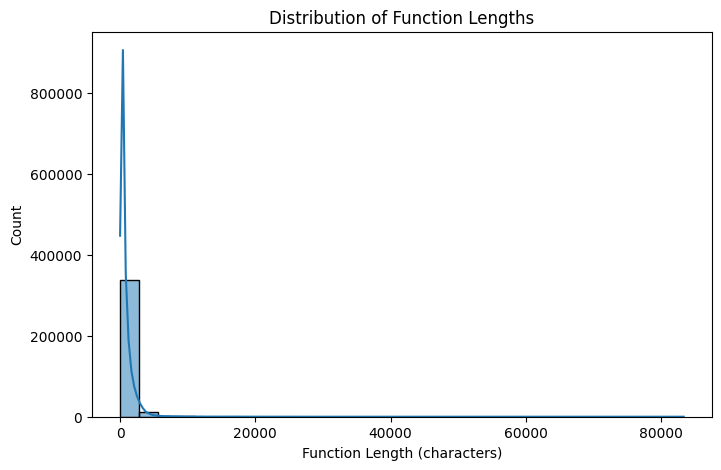

In [8]:
df["function_length"] = df["func"].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 5))
sns.histplot(df["function_length"], bins=30, kde=True)
plt.xlabel("Function Length (characters)")
plt.ylabel("Count")
plt.title("Distribution of Function Lengths")
plt.show()

In [9]:
for col in df.columns[:-1]:  # Excluding the last column
    print(f"{col}: {df[col].apply(type).value_counts()}")


cve_id: cve_id
<class 'str'>    353873
Name: count, dtype: int64
cwe_ids: cwe_ids
<class 'list'>    353873
Name: count, dtype: int64
cvss_vector: cvss_vector
<class 'str'>         353778
<class 'NoneType'>        95
Name: count, dtype: int64
cvss_is_v3: cvss_is_v3
<class 'float'>    353873
Name: count, dtype: int64
repo_name: repo_name
<class 'str'>    353873
Name: count, dtype: int64
commit_msg: commit_msg
<class 'str'>    353873
Name: count, dtype: int64
commit_hash: commit_hash
<class 'str'>    353873
Name: count, dtype: int64
git_url: git_url
<class 'str'>    353873
Name: count, dtype: int64
file_path: file_path
<class 'str'>    353873
Name: count, dtype: int64
func_name: func_name
<class 'str'>    353873
Name: count, dtype: int64
func_before: func_before
<class 'NoneType'>    335898
<class 'str'>          17975
Name: count, dtype: int64
abstract_func_before: abstract_func_before
<class 'NoneType'>    335898
<class 'str'>          17975
Name: count, dtype: int64
func_graph_path_bef

In [10]:
df.shape

(353873, 20)

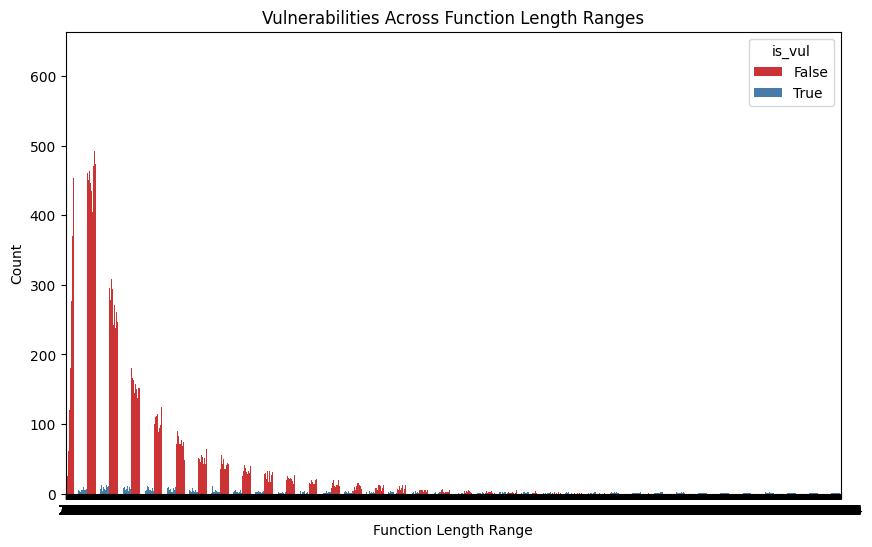

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='function_length', hue='is_vul', data=df, palette='Set1')
plt.title('Vulnerabilities Across Function Length Ranges')
plt.xlabel('Function Length Range')
plt.ylabel('Count')
plt.show()

In [13]:
# Since 'commit_date' is missing, infer temporal order by grouping commits
# Group by repository and commit to simulate a timeline
grouped = df.groupby(['repo_name', 'commit_hash'])

# Initialize storage for temporal features
file_stats = {}
features = []
labels = []

# Process commits in order per repository
for (repo_name, commit_hash), commit_df in grouped:
    file_groups = commit_df.groupby('file_path')

    for file_path, file_df in file_groups:
        # Initialize stats for new files
        if file_path not in file_stats:
            file_stats[file_path] = {'cum_vul_count': 0, 'commit_count': 0}

        # Get past vulnerability count and commit count as proxy for time
        past_vul_count = file_stats[file_path]['cum_vul_count']
        commit_count = file_stats[file_path]['commit_count']

        # Extract features for each function in this file/commit
        for idx, row in file_df.iterrows():
            features.append({
                'past_vul_count': past_vul_count,
                'commit_count': commit_count  # Proxy for temporal progression
            })
            labels.append(row['is_vul'])

        # Update stats after processing this commit
        num_vul_this_commit = file_df['is_vul'].sum()
        file_stats[file_path]['cum_vul_count'] += num_vul_this_commit
        file_stats[file_path]['commit_count'] += 1

# Create feature DataFrame
feature_df = pd.DataFrame(features)
feature_df['label'] = labels
print(feature_df.head())

   past_vul_count  commit_count  label
0               0             0   True
1               0             0   True
2               0             0  False
3               0             0  False
4               0             0  False


In [19]:
feature_df['past_vul_count'].unique()

array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10,  4, 12, 11, 13, 14, 15, 16,
       18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 17, 26,
       34, 35, 36, 37, 38, 39, 41, 43, 40, 50, 60, 70, 45, 46, 47, 48, 49,
       52, 54, 57, 51, 59, 61, 63, 53, 44, 56, 62, 95, 99, 42, 55, 80, 89])

In [20]:
feature_df['commit_count'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [23]:
# CodeBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
model = AutoModel.from_pretrained("microsoft/codebert-base")

def get_embedding(code):
    inputs = tokenizer(code, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# first 1000 rows
subset_df = df.head(1000)
embeddings = subset_df['func'].apply(get_embedding)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

NameError: name 'np' is not defined

In [26]:
embedding_array = np.stack(embeddings.values)
print(f"Embedding shape: {embedding_array.shape}")

Embedding shape: (1000, 768)


In [27]:
X_temporal = feature_df[['past_vul_count', 'commit_count']]
y = feature_df['label']

X_train, X_test, y_train, y_test = train_test_split(X_temporal, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

Precision: 0.8333, Recall: 0.0126, F1-score: 0.0249


In [29]:
subset_features = feature_df.iloc[:1000][['past_vul_count', 'commit_count']]
subset_labels = feature_df['label'].iloc[:1000]
X_combined = np.hstack((subset_features, embedding_array))
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combined, subset_labels, test_size=0.2, random_state=42)

clf_combined = RandomForestClassifier(n_estimators=100, random_state=42)
clf_combined.fit(X_train_c, y_train_c)
y_pred_c = clf_combined.predict(X_test_c)
precision_c = precision_score(y_test_c, y_pred_c)
recall_c = recall_score(y_test_c, y_pred_c)
f1_c = f1_score(y_test_c, y_pred_c)
print(f"Combined - Precision: {precision_c:.4f}, Recall: {recall_c:.4f}, F1-score: {f1_c:.4f}")

Combined - Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
